**Tarea 8.- Series de tiempo 2 (Multivariable)**
- Baiza Orona Karen Bibiana
- Maldonado Arana Victor Josue

- Dataset - weather_madrid_LEMD_1997_2015

In [ ]:
import numpy as np
#Libreria para la manipulación y análisis de datos, sirve para la lectura e importación de la información en formato csv
import pandas as pd
#Libreria que contiene la estructura principal de pandas.
from pandas import DataFrame
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [ ]:
# Cargar el conjunto de datos
dataset = pd.read_csv('weather_madrid_LEMD_1997_2015.csv')
print(dataset.head())

        CET  Max TemperatureC  Mean TemperatureC  Min TemperatureC  \
0  1997-1-1               7.0                4.0               2.0   
1  1997-1-2               7.0                3.0               0.0   
2  1997-1-3               5.0                3.0               2.0   
3  1997-1-4               7.0                3.0              -1.0   
4  1997-1-5               2.0                0.0              -1.0   

   Dew PointC  MeanDew PointC  Min DewpointC  Max Humidity   Mean Humidity  \
0         5.0             3.0            2.0         100.0            95.0   
1         6.0             3.0            0.0         100.0            92.0   
2         5.0             1.0           -1.0         100.0            85.0   
3        -2.0            -3.0           -4.0          86.0            63.0   
4         2.0             0.0           -3.0         100.0            95.0   

    Min Humidity  ...   Max VisibilityKm   Mean VisibilityKm  \
0           76.0  ...               10.0      

In [ ]:
dataset = pd.read_csv('weather_madrid_LEMD_1997_2015.csv', delimiter=',')

# Mostramos las columnas detectadas
print(dataset.columns)


Index(['CET', 'Max TemperatureC', 'Mean TemperatureC', 'Min TemperatureC',
       'Dew PointC', 'MeanDew PointC', 'Min DewpointC', 'Max Humidity',
       ' Mean Humidity', ' Min Humidity', ' Max Sea Level PressurehPa',
       ' Mean Sea Level PressurehPa', ' Min Sea Level PressurehPa',
       ' Max VisibilityKm', ' Mean VisibilityKm', ' Min VisibilitykM',
       ' Max Wind SpeedKm/h', ' Mean Wind SpeedKm/h', ' Max Gust SpeedKm/h',
       'Precipitationmm', ' CloudCover', ' Events', 'WindDirDegrees'],
      dtype='object')


In [ ]:
# Limpieza de los nombres de las columnas
dataset.columns = dataset.columns.str.strip()  # Elimina espacios en blanco
print(dataset.columns)


Index(['CET', 'Max TemperatureC', 'Mean TemperatureC', 'Min TemperatureC',
       'Dew PointC', 'MeanDew PointC', 'Min DewpointC', 'Max Humidity',
       'Mean Humidity', 'Min Humidity', 'Max Sea Level PressurehPa',
       'Mean Sea Level PressurehPa', 'Min Sea Level PressurehPa',
       'Max VisibilityKm', 'Mean VisibilityKm', 'Min VisibilitykM',
       'Max Wind SpeedKm/h', 'Mean Wind SpeedKm/h', 'Max Gust SpeedKm/h',
       'Precipitationmm', 'CloudCover', 'Events', 'WindDirDegrees'],
      dtype='object')


In [ ]:
# Ver los primeros datos para confirmar que todo está bien
print(dataset.head())


        CET  Max TemperatureC  Mean TemperatureC  Min TemperatureC  \
0  1997-1-1               7.0                4.0               2.0   
1  1997-1-2               7.0                3.0               0.0   
2  1997-1-3               5.0                3.0               2.0   
3  1997-1-4               7.0                3.0              -1.0   
4  1997-1-5               2.0                0.0              -1.0   

   Dew PointC  MeanDew PointC  Min DewpointC  Max Humidity  Mean Humidity  \
0         5.0             3.0            2.0         100.0           95.0   
1         6.0             3.0            0.0         100.0           92.0   
2         5.0             1.0           -1.0         100.0           85.0   
3        -2.0            -3.0           -4.0          86.0           63.0   
4         2.0             0.0           -3.0         100.0           95.0   

   Min Humidity  ...  Max VisibilityKm  Mean VisibilityKm  Min VisibilitykM  \
0          76.0  ...              10.

In [ ]:
dataset.columns = dataset.columns.str.strip()


In [ ]:
# Seleccionamos columnas específicas para el análisis
dataset = dataset[['Max Humidity', 'Mean Humidity', 'Min Humidity']]
print(dataset.head())


   Max Humidity  Mean Humidity  Min Humidity
0         100.0           95.0          76.0
1         100.0           92.0          71.0
2         100.0           85.0          70.0
3          86.0           63.0          49.0
4         100.0           95.0          86.0


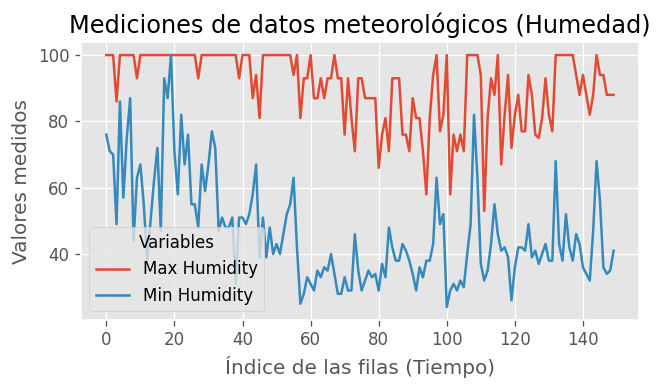

In [ ]:
# Datos originales
# Gráfica para visualizar las primeras 150 mediciones de temperaturas máximas y mínimas
# Variables utilizadas Max Humidity, Mean Humidity, Min Humidity

plt.figure(figsize=(6, 3), dpi=120)
plt.style.use("ggplot")
plt.plot(dataset['Max Humidity'][:150], label='Max Humidity')
plt.plot(dataset['Min Humidity'][:150], label='Min Humidity')
plt.title('Mediciones de datos meteorológicos (Humedad)')
plt.xlabel('Índice de las filas (Tiempo)')
plt.ylabel('Valores medidos')
plt.legend(title='Variables')
plt.show()

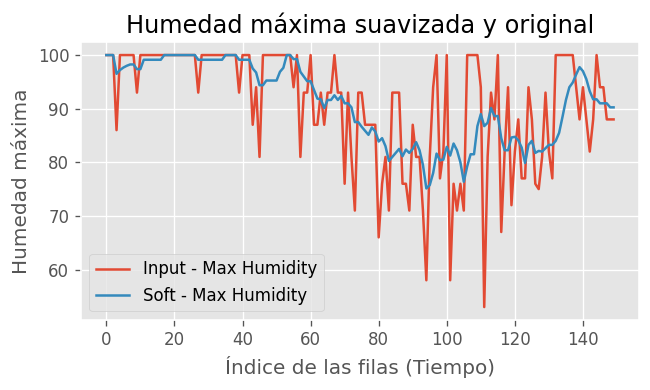

In [ ]:
# Suavizamos los datos con la media móvil
dataset_soft = pd.DataFrame(dataset).rolling(window=8, min_periods=1).mean()

# Gráfica de datos suavizados
plt.figure(figsize=(6, 3), dpi=120)
plt.style.use("ggplot")
plt.plot(dataset['Max Humidity'][:150], label='Input - Max Humidity')
plt.plot(dataset_soft['Max Humidity'][:150], label='Soft - Max Humidity')
plt.title('Humedad máxima suavizada y original')
plt.xlabel('Índice de las filas (Tiempo)')
plt.ylabel('Humedad máxima')
plt.legend()
plt.show()

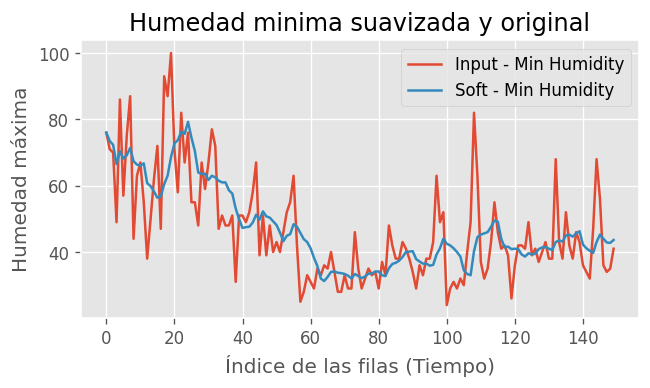

In [ ]:
# Suavizamos los datos con la media móvil
dataset_soft = pd.DataFrame(dataset).rolling(window=8, min_periods=1).mean()

# Gráfica de datos suavizados
plt.figure(figsize=(6, 3), dpi=120)
plt.style.use("ggplot")
plt.plot(dataset['Min Humidity'][:150], label='Input - Min Humidity')
plt.plot(dataset_soft['Min Humidity'][:150], label='Soft - Min Humidity')
plt.title('Humedad minima suavizada y original')
plt.xlabel('Índice de las filas (Tiempo)')
plt.ylabel('Humedad máxima')
plt.legend()
plt.show()

In [ ]:
def series_to_supervised(data, w=1, h=1, dropnan= True):
  n_variables = 1 if type(data) is list else data.shape[1]
  print(n_variables)
  df = DataFrame(data)
  cols, names = [], []
  #Datos de entrada, secuencia temporal (t-w, ..., t)
  for i in range(w, 0, -1):
    cols.append(df.shift(i))
    if i-1 == 0:
      names += [('Var {} (t)'.format(j+1)) for j in range(n_variables)]
    else:
      names += [('Var {} (t-{})'.format(j+1, i-1)) for j in range(n_variables)]
  #Datos de pronóstico, salida esperada (t+1, ..., t+h)
  for i in range(h):
    cols.append(df.shift(-1))
    names += [('Var {} (t+{})'.format(j+1, i+1)) for j in range(n_variables)]
  #Concatenar información
  agg = pd.concat(cols, axis= 1)
  agg.columns = names
  if dropnan:
    agg.dropna(inplace= True)
  return agg

In [ ]:
                   # Especifica cuántos valores anteriores se utilizarán para hacer la predicción
window_size = 5    # tomara los ultimos 5 valores atras y los utilizara para predecir (se vuelven datos de entrada)
horizon = 1        # Este parámetro especifica cuántos pasos hacia el futuro se quieren predecir
var_num = 2        # Especifica cuantas columnas seran utilizadas  (2 mínima y máxima)

dataset_serialized = series_to_supervised(dataset, window_size, horizon, dropnan = True)
print(dataset_serialized)

3
      Var 1 (t-4)  Var 2 (t-4)  Var 3 (t-4)  Var 1 (t-3)  Var 2 (t-3)  \
5           100.0         95.0         76.0        100.0         92.0   
6           100.0         92.0         71.0        100.0         85.0   
7           100.0         85.0         70.0         86.0         63.0   
8            86.0         63.0         49.0        100.0         95.0   
9           100.0         95.0         86.0        100.0         82.0   
...           ...          ...          ...          ...          ...   
6806        100.0         76.0         42.0        100.0         78.0   
6807        100.0         78.0         36.0        100.0         78.0   
6808        100.0         78.0         35.0        100.0         84.0   
6809        100.0         84.0         54.0        100.0         83.0   
6810        100.0         83.0         45.0        100.0         87.0   

      Var 3 (t-3)  Var 1 (t-2)  Var 2 (t-2)  Var 3 (t-2)  Var 1 (t-1)  \
5            71.0        100.0         85.0     

In [ ]:
# Procesamiento de datos
# Al normalizar los números deben de estar entre 0 y 1
# Ahora puedes normalizar los datos
dataset_normalizado = preprocessing.minmax_scale(dataset_serialized, feature_range=(0, 1))

# Mostrar los datos normalizados
print(dataset_normalizado)

[[1.         0.94117647 0.75       ... 1.         0.91764706 0.73958333]
 [1.         0.90588235 0.69791667 ... 1.         0.95294118 0.86458333]
 [1.         0.82352941 0.6875     ... 1.         0.58823529 0.41666667]
 ...
 [1.         0.74117647 0.32291667 ... 1.         0.87058824 0.64583333]
 [1.         0.81176471 0.52083333 ... 0.91666667 0.84705882 0.6875    ]
 [1.         0.8        0.42708333 ... 1.         0.88235294 0.6875    ]]


In [ ]:
print(dataset_normalizado.shape)
dataset_normalizado = dataset_normalizado.reshape(-1, var_num, window_size+horizon)
print(dataset_normalizado.shape)


(10197, 2, 6)
(10197, 2, 6)


In [ ]:
"""print(dataset_normalizado.shape)
dataset_normalizado = dataset_normalizado.reshape(dataset_normalizado.shape[0], var_num, window_size+horizon)
print(dataset_normalizado.shape)"""

(10197, 2, 6)
(10197, 2, 6)


In [ ]:
# Se usa para series de tiempos multivariables

x = dataset_normalizado[:, :,:-horizon]
y = dataset_normalizado[:, :, -horizon:]

#Dividimos la información en dos partes, la información que será utilzada para entrenamiento y la información para probar la calidad del aprendizaje
#Existen diferentes puntos de vista cuanto porcentaje para cada uno, pero aquí se utilizará 80% para entrenamiento y 20% para pruebas.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= .2, random_state=22)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size= .2, random_state=22)

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(6525, 2, 5)
(1632, 2, 5)
(2040, 2, 5)
(6525, 2, 1)
(1632, 2, 1)
(2040, 2, 1)


In [ ]:
model = keras.Sequential()
model.add(keras.layers.Dense(20, activation = 'relu', input_shape=(x_train.shape[1], x_train.shape[2]))) # importante declarar correctamente shape
model.add(keras.layers.Dense(40, activation='relu'))
model.add(keras.layers.Dense(20, activation='relu'))
model.add(keras.layers.Dense(horizon, activation = 'sigmoid'))    # función de activación para la neurona de salida

#Se compila el modelo y se define el optimizador y metricas a utilizar
model.compile(loss = 'mse', optimizer = 'adam', metrics=['mse'])

#Se entrena el modelo y se almacena en una variable los resultados del entrenamiento.
history = model.fit(x_train, y_train, epochs=100, batch_size=24, validation_data=(x_val, y_val), verbose=1, shuffle=False)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


272/272 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0315 - mse: 0.0315 - val_loss: 0.0045 - val_mse: 0.0045
Epoch 2/100
272/272 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0036 - val_mse: 0.0036
Epoch 3/100
272/272 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0037 - mse: 0.0037 - val_loss: 0.0032 - val_mse: 0.0032
Epoch 4/100
272/272 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0034 - mse: 0.0034 - val_loss: 0.0031 - val_mse: 0.0031
Epoch 5/100
272/272 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 0.0030 - val_mse: 0.0030
Epoch 6/100
272/272 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 0.0030 - val_mse: 0.0030
Epoch 7/100
272/272 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 0.0029 - val_mse: 0.0029
Epoch 8/100
272/272 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 0.0029 - val_mse: 0.0029
Epoch 9/100
272/272 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss:

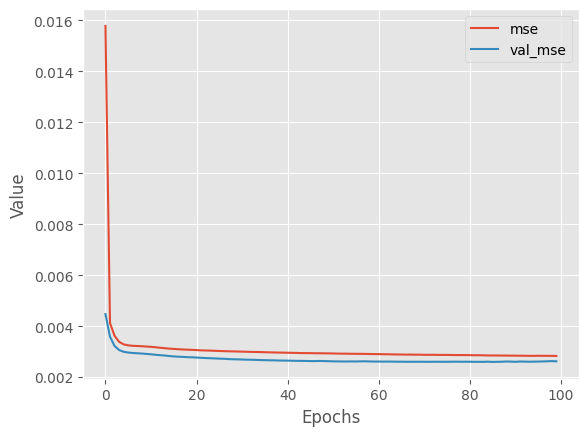

In [ ]:
# Evaluación del modelo
plt.style.use("ggplot")
plt.plot(history.history['mse'], label='mse')
plt.plot(history.history['val_mse'], label='val_mse')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.show()

In [ ]:
#Se evalua el modelo
aciertos = model.evaluate(x_test, y_test, verbose=0)
print('Perdida:', aciertos[0])

Perdida: 0.002876691985875368


In [ ]:
predictions = model.predict(x_test, verbose=0)
print(predictions[:5])

[[[0.6823846 ]
  [0.57939744]]

 [[0.13762817]
  [0.11714529]]

 [[0.38751253]
  [0.43106067]]

 [[0.12985304]
  [0.09031478]]

 [[0.2684775 ]
  [0.53328925]]]


In [ ]:
preds = predictions.reshape(predictions.shape[0], 2)
y_original = y_test.reshape(y_test.shape[0], 2)

print(preds[:5])  # Verifica los primeros 5 elementos

[[0.6823846  0.57939744]
 [0.13762817 0.11714529]
 [0.38751253 0.43106067]
 [0.12985304 0.09031478]
 [0.2684775  0.53328925]]


In [ ]:
print(predictions.shape)
print(y_test.shape)

(2040, 2, 1)
(2040, 2, 1)


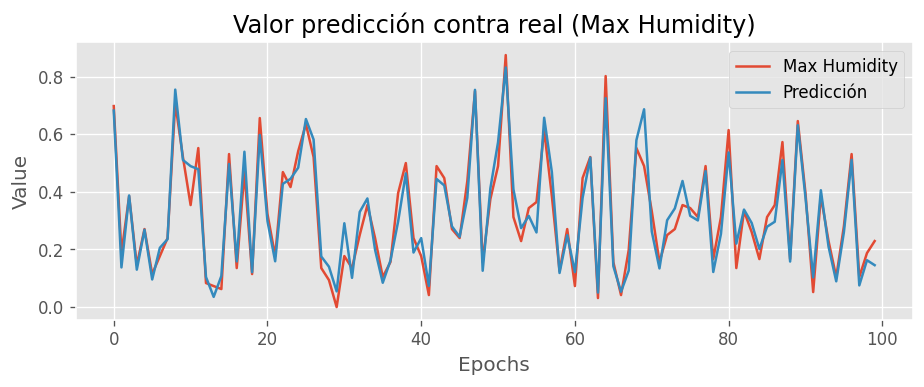

In [ ]:
#Se gráfican los resultados (Maxium temperature)
plt.figure(num=None, figsize=(9, 3), dpi=120, facecolor='w', edgecolor='k')
plt.plot(y_original[0:100,0], label= 'Max Humidity')
plt.plot(predictions[0:100,0], label='Predicción')
plt.title('Valor predicción contra real (Max Humidity)')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.show()

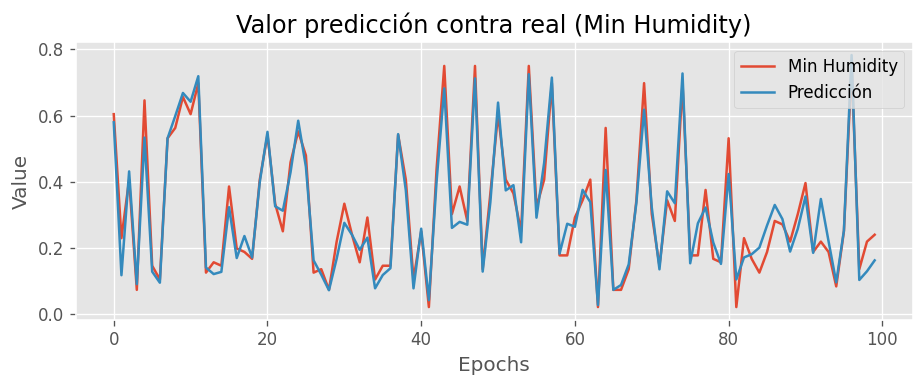

In [ ]:
#Se gráfican los resultados
plt.figure(num=None, figsize=(9, 3), dpi=120, facecolor='w', edgecolor='k')
plt.plot(y_original[0:100,1], label= 'Min Humidity')
plt.plot(predictions[0:100,1], label='Predicción')
plt.title('Valor predicción contra real (Min Humidity)')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.show()